In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
import csv
import pandas as pd
import glob
import cv2
torch.cuda.set_device(0)

/home/leo/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Data

### Setup

In [3]:
# PATH = Path('data/carvana')
PATH = Path('data/OCT')
list(PATH.iterdir())

[PosixPath('data/OCT/test'),
 PosixPath('data/OCT/train'),
 PosixPath('data/OCT/train.csv'),
 PosixPath('data/OCT/validation'),
 PosixPath('data/OCT/models'),
 PosixPath('data/OCT/tmp')]

In [4]:
TRAIN_DN = 'train/original_images'
MASKS_DN = 'train/label_images'

In [5]:
# TRAIN_DNS = (PATH/TRAIN_DN).iterdir()
# TRAIN_DNS = [ o for o in TRAIN_DNS]

In [6]:
# print(TRAIN_DNS[0])

### Creating CSV of original data

In [7]:
img_names=[]
for o in TRAIN_DNS:
    for i in range(128):
        img_names.append([f'{str(o.name)}_img_{i+1}.png',f'{str(o.name[:-4])}_labelMark_label_{i+1}.png'])

In [8]:
# print((np.array(img_names[0:3])))

In [9]:
header = ['orignal','label']
with open('./data/OCT/train.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(img_names)

In [10]:
masks_csv = pd.read_csv(PATH/'train.csv')
masks_csv.head()

,orignal,label
0,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...
1,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...
2,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...
3,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...
4,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...


### put all images into one directory

In [11]:
# print((PATH/'train/train_label_128_png'))

In [12]:
# (PATH/'train/train_label_128_png').mkdir(exist_ok=True)

In [13]:
# all_imgs_name = glob.glob(f'{PATH}/train/label_images/*/*.bmp')
# all_imgs_name = [Path(o) for o in all_imgs_name]
# print(len(all_imgs_name))

In [14]:
# def resize_convert(fname):
#     print((PATH/f'train/train_label_128_png/{fname.parent.name}_label_{fname.name[:-4]}.png'))
#     Image.open(fname).resize((128,128)).save((PATH/f'train/train_label_128_png/{fname.parent.name}_label_{fname.name[:-4]}.png'))

In [15]:
# print(all_imgs_name[0])

In [16]:
# resize_convert(all_imgs_name[0])

In [17]:
# with ThreadPoolExecutor(4) as e: e.map(resize_convert, all_imgs_name)

In [18]:
# print(list((PATH/'train/train_label_128_png').iterdir())[0].name)
# print(Path(img_names[0][1]).name)

In [11]:
def show_img(im, figsize=None, ax=None, alpha=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, alpha=alpha)
    ax.set_axis_off()
    return ax

In [20]:
img_name = 'PC014_MacularCube512x128_9-10-2013_11-0-41_OD_sn9440_cube_z'

In [18]:
TRAIN_DN_128 = 'train/train_original_128_png'
MASKS_DN_128 = 'train/train_label_128_png'

In [22]:
list((PATH/TRAIN_DN_128).iterdir())[:5]

[PosixPath('data/OCT/train/train_original_128_png/PC006_MacularCube512x128_9-17-2013_10-50-31_OS_sn9831_cube_z.img_img_98.png'),
 PosixPath('data/OCT/train/train_original_128_png/P0408_MacularCube512x128_6-19-2018_10-25-14_OD_sn168714_cube_z.img_img_21.png'),
 PosixPath('data/OCT/train/train_original_128_png/PC008_MacularCube512x128_9-12-2013_10-50-5_OD_sn9624_cube_z.img_img_75.png'),
 PosixPath('data/OCT/train/train_original_128_png/PC005_MacularCube512x128_3-21-2014_11-1-3_OD_sn18956_cube_z.img_img_121.png'),
 PosixPath('data/OCT/train/train_original_128_png/PC030_MacularCube512x128_11-28-2013_8-39-42_OD_sn13493_cube_z.img_img_72.png')]

In [23]:
print((PATH/TRAIN_DN_128/f'{img_name}.img_img_1.png'))

data/OCT/train/train_original_128_png/PC014_MacularCube512x128_9-10-2013_11-0-41_OD_sn9440_cube_z.img_img_1.png


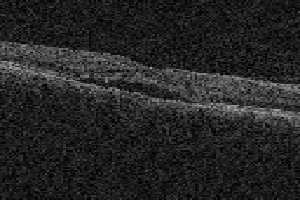

In [24]:
Image.open(PATH/TRAIN_DN_128/f'{img_name}.img_img_66.png').resize((300,200))

In [25]:
list((PATH/MASKS_DN_128).iterdir())[:5]

[PosixPath('data/OCT/train/train_label_128_png/PC014_MacularCube512x128_9-10-2013_11-0-41_OD_sn9440_cube_z_labelMark_label_106.png'),
 PosixPath('data/OCT/train/train_label_128_png/P0237_MacularCube512x128_4-16-2014_11-4-39_OS_sn20608_cube_z_labelMark_label_28.png'),
 PosixPath('data/OCT/train/train_label_128_png/P0237_MacularCube512x128_4-16-2014_11-7-20_OD_sn20613_cube_z_labelMark_label_11.png'),
 PosixPath('data/OCT/train/train_label_128_png/P0097_MacularCube512x128_5-16-2013_10-13-43_OS_sn3207_cube_z_labelMark_label_33.png'),
 PosixPath('data/OCT/train/train_label_128_png/P0077_MacularCube512x128_1-15-2014_8-43-12_OD_sn16128_cube_z_labelMark_label_127.png')]

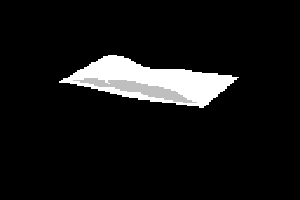

In [26]:
Image.open(PATH/MASKS_DN_128/f'{img_name}_labelMark_label_66.png').resize((300,200))

In [27]:
ims = [open_image(PATH/TRAIN_DN_128/f'{img_name}.img_img_{i+1}.png') for i in range(16)]

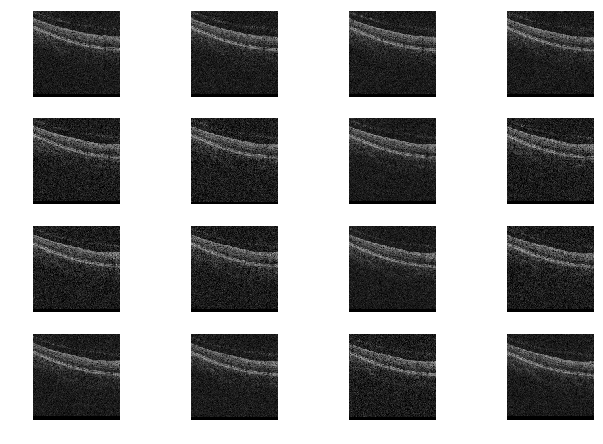

In [28]:
fig, axes = plt.subplots(4, 4, figsize=(9, 6))
for i,ax in enumerate(axes.flat): show_img(ims[i], ax=ax)
plt.tight_layout(pad=0.1)

### Resize and convert

In [29]:
# (PATH/'train_masks_png').mkdir(exist_ok=True)

In [30]:
# def convert_img(fn):
#     fn = fn.name
#     Image.open(PATH/'train_masks'/fn).save(PATH/'train_masks_png'/f'{fn[:-4]}.png')

In [31]:
# files = list((PATH/'train_masks').iterdir())
# with ThreadPoolExecutor(8) as e: e.map(convert_img, files)

In [32]:
# files[:4]

In [33]:
# (PATH/'train_masks-512').mkdir(exist_ok=True)

In [34]:
# def resize_mask(fn):
#     Image.open(fn).resize((512,512)).save((fn.parent.parent)/'train_masks-512'/fn.name)

# files = list((PATH/'train_masks_png').iterdir())
# with ThreadPoolExecutor(6) as e: e.map(resize_mask, files)

In [35]:
# (PATH/'train-512').mkdir(exist_ok=True)

In [36]:
# def resize_img(fn):
#     Image.open(fn).resize((512,512)).save((fn.parent.parent)/'train-512'/fn.name)

# files = list((PATH/'train').iterdir())
# with ThreadPoolExecutor(6) as e: e.map(resize_img, files)

## Dataset

In [12]:
TRAIN_DN = 'train_original_128_png'
MASKS_DN = 'train_label_128_png'
sz = 128
# bs = 64
bs =4

In [393]:
ims = [open_image(PATH/TRAIN_DN_128/f'{img_name}.img_img_{i+77}.png') for i in range(16)]
im_masks = [open_image(PATH/MASKS_DN_128/f'{img_name}_labelMark_label_{i+77}.png') for i in range(16)]

OSError: No such file or directory: data/OCT/train/train_original_128_png/PC014_MacularCube512x128_9-10-2013_11-0-41_OD_sn9440_cube_z.img_img_77.png

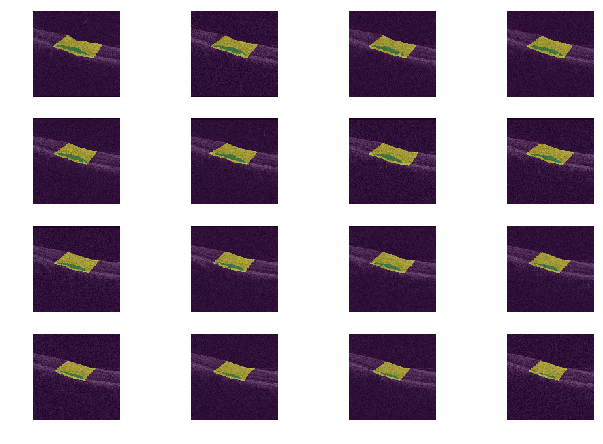

In [471]:
fig, axes = plt.subplots(4, 4, figsize=(9, 6))
for i,ax in enumerate(axes.flat):
    ax = show_img(ims[i], ax=ax)
    show_img(im_masks[i][...,0], ax=ax, alpha=0.5)
plt.tight_layout(pad=0.1)

In [13]:
class MatchedFilesDataset(FilesDataset):
    def __init__(self, fnames, y, transform, path):
        self.y=y
        assert(len(fnames)==len(y))
        super().__init__(fnames, transform, path)
    def get_y(self, i): 
        testy = open_image(os.path.join(self.path, self.y[i]),not_normalized=True)
#         for i in range(256):
#             index = np.where(testy == i)
#             suma = np.sum(index)
#             if suma>0:
#                 print(i)
#         print('testy shape:',testy.shape)
        mask = testy[:,:,0]     
#         print('mask shape:',mask.shape)
        new_mask = np.zeros((128,128,4)) # 4 is the number of classes
#         for i in range(256):
#             index = np.where(mask == i)
#             suma = np.sum(index)
#             if suma>0:
#                 print(i)
        new_mask[:,:,0] = ((mask - 0)==0)*1 + ((mask - 1)==0)*1
        new_mask[:,:,1] = ((mask - 128)==0)*1
        new_mask[:,:,2] = ((mask - 191)==0)*1
        new_mask[:,:,3] = ((mask - 255)==0)*1
        
        new_mask = np.rollaxis(new_mask,2)
#         print('new_mask_sum:',np.sum(new_mask))

        return np.array(new_mask,dtype=np.float)
#     def get_y(self, i ): 
#         temp_y = open_image(os.path.join(self.path, self.y[i]))
#         print('before:',temp_y.shape)
#         testy = np.array(temp_y).transpose(1,2,0)
#         print('after:',testy.shape)
#         return testy
    def get_c(self): return 0

In [14]:
# x = np.arange(16).reshape(4,4)
# def test(mask):
#     new_mask = np.zeros((4,4,4)) # 4 is the number of classes
#     new_mask[:,:,0] = ((mask - 0)==0)*1
#     new_mask[:,:,1] = ((mask - 1)==0)*1
#     new_mask[:,:,2] = ((mask - 2)==0)*1
#     new_mask[:,:,3] = ((mask - 3)==0)*1
#     return new_mask
# z = test(x)
# print(z)

In [15]:
train_csv = pd.read_csv((PATH/'train.csv'))

In [16]:
train_csv.head()

,orignal,label
0,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...
1,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...
2,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...
3,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...
4,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...,PC010_MacularCube512x128_5-28-2013_10-8-29_OD_...


In [399]:
# x_names = np.array([Path(TRAIN_DN_128)/o for o in train_csv['orignal']])
# y_names = np.array([Path(MASKS_DN_128)/o for o in train_csv['label']])

In [19]:
x_names = np.array([Path(TRAIN_DN_128)/f'P0012_MacularCube512x128_8-7-2014_13-29-39_OS_sn27946_cube_z.img_img_{51+i}.png' for i in range(30)])
y_names = np.array([Path(MASKS_DN_128)/f'P0012_MacularCube512x128_8-7-2014_13-29-39_OS_sn27946_cube_z_labelMark_label_{51+i}.png' for i in range(30)])

In [20]:
print(x_names[0])
# print(test_x_names[0])
print(y_names)

train/train_original_128_png/P0012_MacularCube512x128_8-7-2014_13-29-39_OS_sn27946_cube_z.img_img_51.png
[PosixPath('train/train_label_128_png/P0012_MacularCube512x128_8-7-2014_13-29-39_OS_sn27946_cube_z_labelMark_label_51.png')
 PosixPath('train/train_label_128_png/P0012_MacularCube512x128_8-7-2014_13-29-39_OS_sn27946_cube_z_labelMark_label_52.png')
 PosixPath('train/train_label_128_png/P0012_MacularCube512x128_8-7-2014_13-29-39_OS_sn27946_cube_z_labelMark_label_53.png')
 PosixPath('train/train_label_128_png/P0012_MacularCube512x128_8-7-2014_13-29-39_OS_sn27946_cube_z_labelMark_label_54.png')
 PosixPath('train/train_label_128_png/P0012_MacularCube512x128_8-7-2014_13-29-39_OS_sn27946_cube_z_labelMark_label_55.png')
 PosixPath('train/train_label_128_png/P0012_MacularCube512x128_8-7-2014_13-29-39_OS_sn27946_cube_z_labelMark_label_56.png')
 PosixPath('train/train_label_128_png/P0012_MacularCube512x128_8-7-2014_13-29-39_OS_sn27946_cube_z_labelMark_label_57.png')
 PosixPath('train/train_lab

In [402]:
print(x_names[0])

train/train_original_128_png/P0012_MacularCube512x128_8-7-2014_13-29-39_OS_sn27946_cube_z.img_img_51.png


In [403]:
len(x_names)//16//5*16

0

In [21]:
val_idxs = list(range(4))
((val_x,trn_x),(val_y,trn_y)) = split_by_idx(val_idxs, x_names, y_names)
len(val_x),len(trn_x)

(4, 26)

In [22]:
# aug_tfms = [RandomRotate(4, tfm_y=TfmType.CLASS),
#             RandomFlip(tfm_y=TfmType.CLASS),
#             RandomLighting(0.05, 0.05)]
aug_tfms = []

In [23]:
# aug_tfms = [RandomRotate(4, tfm_y=TfmType.PIXEL),
#             RandomFlip(tfm_y=TfmType.PIXEL),
#             RandomLighting(0.05, 0.05)]

In [24]:
# tfms = tfms_from_model(resnet34, sz, crop_type=CropType.NO, tfm_y=TfmType.CLASS, aug_tfms=aug_tfms)
# datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH)
# md = ImageData(PATH, datasets, bs, num_workers=6, classes=None)

In [25]:
tfms = tfms_from_model(resnet34, sz, crop_type=CropType.NO, tfm_y=TfmType.NO, aug_tfms=aug_tfms)
# tfms = tfms_from_model(resnet34, sz, crop_type=CropType.NO, tfm_y=TfmType.PIXEL, aug_tfms=aug_tfms)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH)
md = ImageData(PATH, datasets, bs, num_workers=6, classes=4)

In [27]:
# open_image('data/OCT/train/train_original_128_png/P0012_MacularCube512x128_8-7-2014_13-29-39_OS_sn27946_cube_z.img_img_52.png')
# for i in range(30):
#     open_image(f'data/OCT/train/train_label_128_png/P0012_MacularCube512x128_8-7-2014_13-29-39_OS_sn27946_cube_z_labelMark_label_{51+i}.png')
#                  data/OCT/train/train_original_128_png/P0012_MacularCube512x128_8-7-2014_13-29-39_OS_sn27946_cube_z_labelMark_label_80.png

~~~~~~~~~~~~~~~~~~: torch.Size([4, 4, 128, 128])


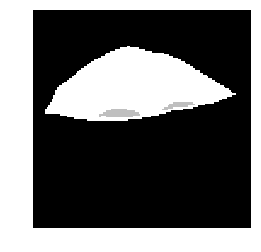

In [30]:
denorm = md.trn_ds.denorm
# aug_iter = iter(md.aug_dl)
trn_iter = iter(md.trn_dl)
x,y = next(trn_iter)
x,y = next(trn_iter)

# print('x.shape:',x.shape)
# print('x[0].shape',x[0].shape)
x = denorm(x)
# print('x[0].shape',x[0].shape)
print('~~~~~~~~~~~~~~~~~~:',y.shape)
# y_new = np.array(y,dtype=np.uint8)
# print(y_new)
# plt.imshow(y_new[5,:,:,3],cmap=plt.cm.gray)
show_mask_4c(y[0])
# print(np.sum(y_new[5,:,:,:]))
# y = denorm(y)
# print(y[0])
# y = cv2.cvtColor(y[0], cv2.COLOR_BGR2GRAY)
# print('testy.shape',y[0].shape)
# testy = np.array(y[0]).transpose(1,2,0)
# print('testy.shape',testy.shape)
# print('y.shape:',y.shape)
# print('y[0].shape',y[0].shape)

# print(x.shape,y[0].shape)

# y = np.array(y).transpose(0,2,3,1)

# print(y.shape)
# print(testy.shape)
# show_img((testy))
# show_img(x[0])
# show_img(testy)
# show_img(y[0])
# show_img(testy)
# print(x[0])
# print(testy)

In [411]:
?np.rollaxis

In [412]:
# y_new = np.array(y,dtype=np.uint8)
# plt.imshow(y_new[5,:,:,3],cmap=plt.cm.gray)

# print(np.sum(y_new[5,:,:,3]))

In [29]:
def show_mask_4c(im, figsize=None, ax=None, alpha=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    im = np.rollaxis(np.array(im),0,3)
    im = np.argmax(im,axis=2)
    fina = (im==0)*0 +(im==1)*128 + (im==2)*191 + (im==3)*255
    fina = np.asarray(fina,dtype = np.uint8)
    ax.imshow(fina, alpha=alpha,cmap=plt.cm.gray)
    ax.set_axis_off()
    return ax

In [414]:
print(np.array(y[i].shape))

IndexError: index 15 is out of range for dimension 0 (of size 4)

(4, 128, 128)
(4, 128, 128)
(4, 128, 128)
(4, 128, 128)


IndexError: index 4 is out of bounds for axis 0 with size 4

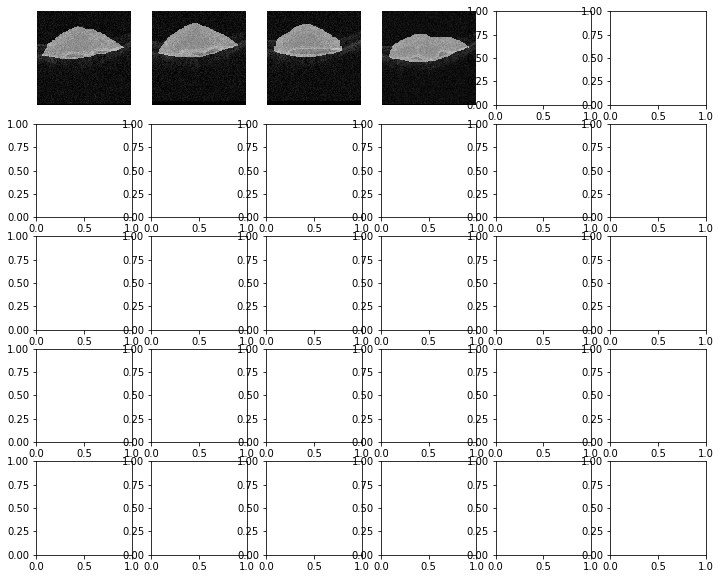

In [31]:
fig, axes = plt.subplots(5, 6, figsize=(12, 10))
for i,ax in enumerate(axes.flat):
    ax=show_img(x[i], ax=ax)
#     show_img(((y[i]*255).astype(np.uint8)), ax=ax, alpha=0.5)
    print(np.array(y[i]).shape)
    show_mask_4c(y[i],ax=ax,alpha=0.5)
plt.tight_layout(pad=0.1)


## Model

In [32]:
class Empty(nn.Module): 
    def forward(self,x): return x

models = ConvnetBuilder(resnet34, 0, 0, 0, custom_head=Empty())

learn = ConvLearner(md, models)
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 128, 128]),
                           ('output_shape', [-1, 64, 64, 64]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 64, 64]),
                           ('output_shape', [-1, 64, 64, 64]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 64, 64]),
                           ('output_shape', [-1, 64, 64, 64]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 64, 64]),
                           ('output_shape', [-1, 64, 32, 32]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 32, 32]),
      

In [33]:
class StdUpsample(nn.Module):
    def __init__(self, nin, nout):
        super().__init__()
        self.conv = nn.ConvTranspose2d(nin, nout, 2, stride=2)
        self.bn = nn.BatchNorm2d(nout)
        
    def forward(self, x): return self.bn(F.relu(self.conv(x)))

In [34]:
# flatten_channel = Lambda(lambda x: x[:,])
# flatten_channel = Lambda(lambda x: np.concatenate((np.expand_dims(x, axis=2), np.expand_dims(x, axis=2), np.expand_dims(x, axis=2)), axis=-1))
# image = np.expand_dims(a, axis=2)
# image = np.concatenate((image, image, image), axis=-1)

In [35]:
# def ChangeChannel(x):
#     x = np.argmax(x,axis=1)
#     x = (x==1)*128 + (x==2)*191 + (x==3)*255
#     return x
# ChangeChannel = Lambda(ChangeChannel)


# x = np.zeros((64,4,128,128))
# x = np.argmax(x,axis=1)
# print(x.shape)
# # x = np.expand_dims(x,axis=1)
# # print(x.shape)
# # y = np.concatenate((x,x,x),axis=1)
# # print(y.shape)
# x = x[:,np.newaxis,:,:]
# x = x.repeat([3],axis=1)
# x = x[,0]
# x.shape

In [36]:
# ?np.expand_dims

In [37]:
# flatten_channel = Lambda(lambda x: x[:,0])

In [38]:
# flatten_channel = Lambda(lambda x: x[:,np.newaxis,:,:].repeat([3],axis=1)[:,0])

In [39]:
# ChangeChannel = Lambda(lambda x:x.argmax(axis=2))

In [40]:
simple_up = nn.Sequential(
    nn.ReLU(),
    StdUpsample(512,256),
    StdUpsample(256,256),
    StdUpsample(256,256),
    StdUpsample(256,256),
#     nn.ConvTranspose2d(256, 1, 2, stride=2),
    nn.ConvTranspose2d(256, 4, 2, stride=2),
    nn.Softmax(dim=1)
#     flatten_channel,
#     ChangeChannel
)

In [41]:
?nn.ConvTranspose2d

In [42]:
# ?nn.Softmax()

In [43]:
# ?nn.Softmax

In [44]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 128, 128]),
                           ('output_shape', [-1, 64, 64, 64]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 64, 64]),
                           ('output_shape', [-1, 64, 64, 64]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 64, 64]),
                           ('output_shape', [-1, 64, 64, 64]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 64, 64]),
                           ('output_shape', [-1, 64, 32, 32]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 32, 32]),
      

In [45]:
models = ConvnetBuilder(resnet34, 0, 1, 0, custom_head=simple_up)
learn = ConvLearner(md, models)
learn.opt_fn=optim.Adam
# learn.crit=nn.BCEWithLogitsLoss()
# learn.crit =nn.CrossEntropyLoss()
learn.crit = nn.BCELoss()
learn.metrics=[accuracy_thresh(0.5)]

In [458]:
# ?nn.BCEWithLogitsLoss()

In [459]:
# learn.summary()

In [460]:
# models = ConvnetBuilder(resnet34, 0, 0, 0, custom_head=simple_up)
# learn = ConvLearner(md, models)
# learn.opt_fn=optim.Adam
# learn.crit=nn.BCEWithLogitsLoss()
# learn.metrics=[accuracy_thresh(0.5)]

epoch      trn_loss   val_loss   <lambda>                
    0      0.648732   13.758773  0.502045  



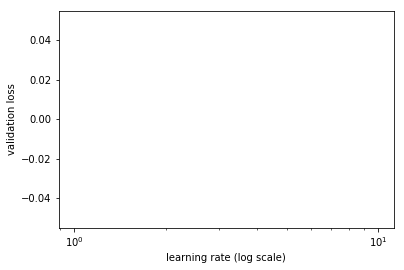

In [46]:
learn.lr_find()
learn.sched.plot()

In [47]:
lr=1e-2

In [48]:
learn.fit(lr,1,cycle_len=30,use_clr=(20,5))

epoch      trn_loss   val_loss   <lambda>                
    0      0.499118   0.536801   0.75      
    1      0.374626   0.246012   0.935291                
    2      0.274208   0.216196   0.955006                
    3      0.216986   0.146441   0.968479                
    4      0.176115   0.133681   0.965012                
    5      0.146725   0.128936   0.964989                
    6      0.124468   0.135651   0.963284               
    7      0.107882   0.092155   0.972794                
    8      0.094067   0.082538   0.974106                 
    9      0.083055   0.073108   0.977715                 
    10     0.073757   0.102716   0.973183                 
    11     0.066151   0.075154   0.977116                 
    12     0.059609   0.076154   0.977299                 
    13     0.05413    0.083676   0.978264                 
    14     0.049428   0.087517   0.976254                 
    15     0.045235   0.076996   0.978142                
    16     0.041518   

[array([0.10235]), 0.978607177734375]

In [49]:
learn.save('tmp')

In [50]:
learn.load('tmp')

In [51]:
py,ay = learn.predict_with_targs()

In [52]:
ay.shape

(4, 4, 128, 128)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

IndexError: index 4 is out of bounds for axis 0 with size 4

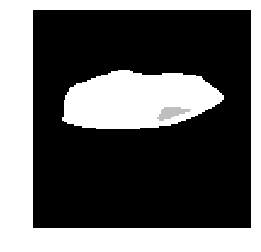

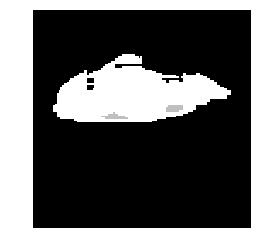

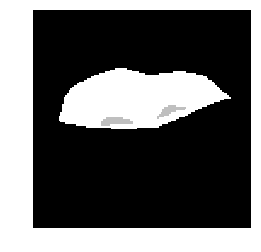

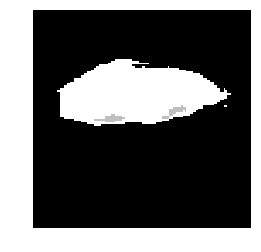

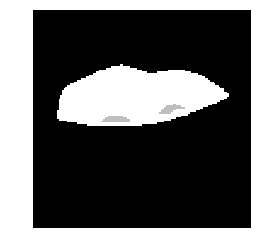

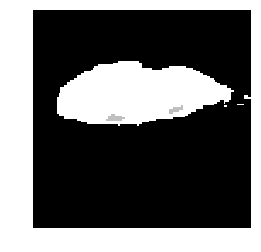

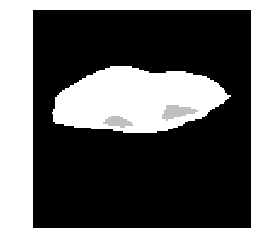

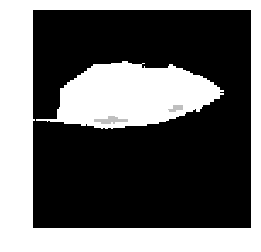

In [53]:
print(ay[1,1,:20,:20])
print(py[1,1,:20,:20])
for i in range(64):
    show_mask_4c(ay[i])
    show_mask_4c(py[i])

In [ ]:
learn.unfreeze()

In [ ]:
learn.bn_freeze(True)

In [ ]:
lrs = np.array([lr/100,lr/10,lr])/4

In [ ]:
learn.fit(lrs,1,cycle_len=20,use_clr=(20,10))

In [ ]:
learn.save('0')

In [ ]:
x,y = next(iter(md.val_dl))
py = to_np(learn.model(V(x)))

In [ ]:
ax = show_img(denorm(x)[0])
show_img(py[0]>0, ax=ax, alpha=0.5);

In [ ]:
ax = show_img(denorm(x)[0])
show_img(y[0], ax=ax, alpha=0.5);

## 512x512

In [ ]:
TRAIN_DN = 'train-512'
MASKS_DN = 'train_masks-512'
sz = 512
bs = 8

In [ ]:
x_names = np.array([Path(TRAIN_DN)/o for o in masks_csv['img']])
y_names = np.array([Path(MASKS_DN)/f'{o[:-4]}_mask.png' for o in masks_csv['img']])

In [ ]:
((val_x,trn_x),(val_y,trn_y)) = split_by_idx(val_idxs, x_names, y_names)
len(val_x),len(trn_x)

In [ ]:
# tfms = tfms_from_model(resnet34, sz, crop_type=CropType.NO, tfm_y=TfmType.CLASS, aug_tfms=aug_tfms)
# datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH)
# md = ImageData(PATH, datasets, bs, num_workers=8, classes=None)

In [ ]:
tfms = tfms_from_model(resnet34, sz, crop_type=CropType.NO, tfm_y=TfmType.CLASS, aug_tfms=aug_tfms)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH)
md = ImageData(PATH, datasets, bs, num_workers=6, classes=None)

In [ ]:
denorm = md.trn_ds.denorm
x,y = next(iter(md.aug_dl))
x = denorm(x)

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i,ax in enumerate(axes.flat):
    ax=show_img(x[i], ax=ax)
    show_img(y[i], ax=ax, alpha=0.5)
plt.tight_layout(pad=0.1)

In [ ]:
simple_up = nn.Sequential(
    nn.ReLU(),
    StdUpsample(512,256),
    StdUpsample(256,256),
    StdUpsample(256,256),
    StdUpsample(256,256),
    nn.ConvTranspose2d(256, 1, 2, stride=2),
    flatten_channel
)

In [ ]:
models = ConvnetBuilder(resnet34, 0, 0, 0, custom_head=simple_up)
learn = ConvLearner(md, models)
learn.opt_fn=optim.Adam
learn.crit=nn.BCEWithLogitsLoss()
learn.metrics=[accuracy_thresh(0.5)]

In [ ]:
learn.load('0')

In [ ]:
learn.lr_find()
learn.sched.plot()

In [ ]:
lr=4e-2

In [ ]:
learn.fit(lr,1,cycle_len=5,use_clr=(20,5))

In [ ]:
learn.save('tmp')

In [ ]:
learn.load('tmp')

In [ ]:
learn.unfreeze()
learn.bn_freeze(True)

In [ ]:
lrs = np.array([lr/100,lr/10,lr])/4

In [ ]:
learn.fit(lrs,1,cycle_len=8,use_clr=(20,8))

In [ ]:
learn.save('512')

In [ ]:
x,y = next(iter(md.val_dl))
py = to_np(learn.model(V(x)))

In [ ]:
ax = show_img(denorm(x)[0])
show_img(py[0]>0, ax=ax, alpha=0.5);

In [ ]:
ax = show_img(denorm(x)[0])
show_img(y[0], ax=ax, alpha=0.5);

## 1024x1024

In [ ]:
sz = 1024
bs = 4

In [ ]:
tfms = tfms_from_model(resnet34, sz, crop_type=CropType.NO, tfm_y=TfmType.CLASS, aug_tfms=aug_tfms)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH)
md = ImageData(PATH, datasets, bs, num_workers=8, classes=None)

In [ ]:
denorm = md.trn_ds.denorm
x,y = next(iter(md.aug_dl))
x = denorm(x)
y = to_np(y)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for i,ax in enumerate(axes.flat):
    show_img(x[i], ax=ax)
    show_img(y[i], ax=ax, alpha=0.5)
plt.tight_layout(pad=0.1)

In [ ]:
simple_up = nn.Sequential(
    nn.ReLU(),
    StdUpsample(512,256),
    StdUpsample(256,256),
    StdUpsample(256,256),
    StdUpsample(256,256),
    nn.ConvTranspose2d(256, 1, 2, stride=2),
    flatten_channel,
)

In [ ]:
models = ConvnetBuilder(resnet34, 0, 0, 0, custom_head=simple_up)
learn = ConvLearner(md, models)
learn.opt_fn=optim.Adam
learn.crit=nn.BCEWithLogitsLoss()
learn.metrics=[accuracy_thresh(0.5)]

In [ ]:
learn.load('512')

In [ ]:
learn.lr_find()
learn.sched.plot()

In [ ]:
lr=4e-2

In [ ]:
learn.fit(lr,1,cycle_len=2,use_clr=(20,4))

In [ ]:
learn.save('tmp')

In [ ]:
learn.load('tmp')

In [ ]:
learn.unfreeze()
learn.bn_freeze(True)

In [ ]:
lrs = np.array([lr/100,lr/10,lr])/8

In [ ]:
learn.fit(lrs,1,cycle_len=40,use_clr=(20,10))

In [ ]:
learn.save('1024')

In [ ]:
x,y = next(iter(md.val_dl))
py = to_np(learn.model(V(x)))

In [ ]:
ax = show_img(denorm(x)[0])
show_img(py[0][0]>0, ax=ax, alpha=0.5);

In [ ]:
ax = show_img(denorm(x)[0])
show_img(y[0,...,-1], ax=ax, alpha=0.5);

In [ ]:
show_img(py[0][0]>0);

In [ ]:
show_img(y[0,...,-1]);

## Fin